# FIT5196 Assessment 2

#### Student Name: Suyash Sathe
#### Student ID: 29279208

Date: 03/10/2018

Environment: Python 3.6.4 and Jupyter notebook

Libraries used: 
* pandas
* math 
* numpy
* sklearn.model_selection


## 1. Introduction

This program performs graphical and non-graphical exploratory analysis to find problems in the dataset "29279208.csv". This program identifies the syntactic, semantic and coverage anomolies and applies fixes on them. 

The following code explains the step by step process to identify and fix the data anamolies.

## 2.  Import libraries 

In [59]:
import pandas as pd
import datetime
import numpy as np
import math
from math import radians, sin, cos, acos
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## 3.  Data Cleaning Process

### 3.a Load data from input file

* Load data from the file "29279208.csv".
* Create a dataframe *data* that holds the data.
* Have an overview over the data displaying its imports aspects and information.

**Note:**
1. The input file should be present in same the folder as this file.

In [60]:
data = pd.read_csv("29279208.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39568 entries, 0 to 39567
Data columns (total 16 columns):
Id                       39546 non-null object
Drone Type               39558 non-null float64
Post Type                39548 non-null float64
Package Weight           39568 non-null float64
Origin Region            39558 non-null float64
Destination Region       39558 non-null float64
Origin Latitude          39568 non-null float64
Origin Longitude         39568 non-null float64
Destination Latitude     39568 non-null float64
Destination Longitude    39568 non-null float64
Journey Distance         39568 non-null float64
Departure Date           39568 non-null object
Departure Time           39568 non-null object
Travel Time              39528 non-null float64
Delivery Time            39568 non-null object
Delivery Fare            39539 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.8+ MB


### 3.b Identify and remove duplicates

* Every row is identified by a unique ID. The first step is to clean the duplicate rows. 
* The information in 3.a tells us that from 39568, there are 22 missing plus duplicate values of ID.

* Idenify the number of rows that have similar values for all columns except the ID column.

In [61]:
data.duplicated(data.columns[1:]).sum()

60

* Remove all the rows that have similar values for all columns except the ID column.

* By priting the information of the data frame, it can be observed that we get unique IDs for 39508 data entries.

In [62]:
data.drop_duplicates(data.columns[1:], keep='first', inplace=True)
data = data.reset_index(drop=True)
data.duplicated(data.columns[1:]).sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 16 columns):
Id                       39508 non-null object
Drone Type               39498 non-null float64
Post Type                39488 non-null float64
Package Weight           39508 non-null float64
Origin Region            39498 non-null float64
Destination Region       39498 non-null float64
Origin Latitude          39508 non-null float64
Origin Longitude         39508 non-null float64
Destination Latitude     39508 non-null float64
Destination Longitude    39508 non-null float64
Journey Distance         39508 non-null float64
Departure Date           39508 non-null object
Departure Time           39508 non-null object
Travel Time              39468 non-null float64
Delivery Time            39508 non-null object
Delivery Fare            39479 non-null float64
dtypes: float64(12), object(4)
memory usage: 4.8+ MB


### 3.c Identify and fix anamolies in Latitudes and Longitudes

* Victoria has latitude co-ordinates in range of -37.00 +/- 2.00 and longitude in range 144.00 +/- 4.00

* To observe the outliers, graphical analysis is done on the latitude and longitude co-ordinates of both origin and destination by plotting in Tableau.

* The following image shows the origin co-ordinates that lie outside the region of Victoria. Points are plotted for origin latitudes and longitudes.

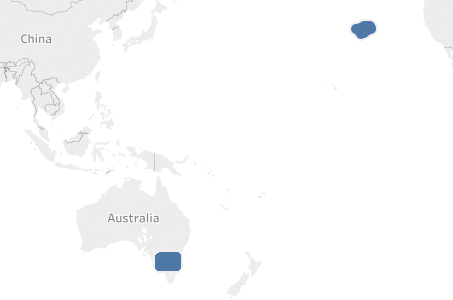

* By observing this data set, it is identified that there are 20 entries whose signs of reversed, i.e., sign of latitudes is positive and sign of longitude is negative.

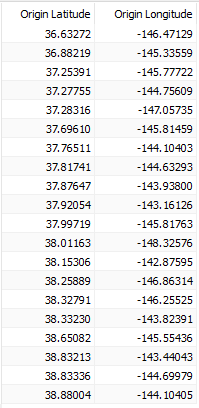

* This issue is fixed by changing the signs of origin latitudes and longitudes.

* Similar anamolies were identified for destination latitudes and longitudes and same fix has been applied to rectify the error.

In [63]:
# Function to change the sign of latitude
def change_latitude(word):
    if word > 0:
        return -1*word
    return word

# Function to change the sign of longitude
def change_longitude(word):
    if word < 0:
        return -1*word
    return word

# Change signs of Destination latitudes and longitudes
data['Destination Latitude'] = data['Destination Latitude'].apply(change_latitude)
data["Destination Longitude"] = data["Destination Longitude"].apply(change_longitude)

# Change signs of Source latitudes and longitudes
data["Origin Latitude"] = data["Origin Latitude"].apply(change_latitude)
data["Origin Longitude"] = data["Origin Longitude"].apply(change_longitude)

### 3.d Calculate and fix the Journey Distance 

* To fix the distance issue, calculate the distance between origin and destination.
* A function is defined that takes latitudes and longitudes of source and destinations to calculate distance between them.

In [64]:
# Function to calculate distance between source and destination
def distance(slat, slon, elat, elon):
    slat *= math.pi/180
    slon *= math.pi/180
    elat *= math.pi/180
    elon *= math.pi/180
    
    # forula to calculate the distance using latitude and longitude
    dist = 6378 * acos(sin(slat)*sin(elat) + cos(slat)*cos(elat)*cos(slon - elon))
    
    # Return result rounded upto 3 decimal digits
    return round(dist,3)

* Use the distance function to calculate distance between source and destination

In [65]:
# Create a copy of original data
dummy_data = data.copy()

# Calculate distance and store it in 'Journey Distance 2' column
dummy_data['Journey Distance 2'] = dummy_data.apply(lambda x: distance(x["Origin Latitude"], x["Origin Longitude"], x['Destination Latitude'], x["Destination Longitude"]), axis=1)

Verify the number of errors in distance
* There are total 15 errors in the distance

In [66]:
# Copy the columns in a temp variable
temp = dummy_data[['Journey Distance', 'Journey Distance 2']].copy()

# Round the decimal upto 3 points
temp["Journey Distance"] = round(temp["Journey Distance"],3)
temp["Difference"] = temp["Journey Distance"] - temp["Journey Distance 2"]

temp[temp["Difference"] !=0].count()

Journey Distance      15
Journey Distance 2    15
Difference            15
dtype: int64

* Impute the rectified distance

In [67]:
# Impute the rectified distance in original data
data["Journey Distance"] = dummy_data["Journey Distance 2"]

# Impute the rectified distance in copy of data
dummy_data["Journey Distance"] = dummy_data["Journey Distance 2"]

# Drop the substitute column after imputing in original column
dummy_data.drop(["Journey Distance 2"], axis=1, inplace= True)

### 3.e Calculate and fix the Departure and Delivery  Time

One of the issues with departure and delivery time is that the two times are swapped.


To tackle this issue, two functions are defined viz., *to_minutes* and *travel_time*
* *to_minutes* : to convert given time to minutes
* *travel_time* : to calculate the travel time.

In [68]:
# function to convert given time to minutes
def to_minutes(time):
    time=time.split(":")
    
    # convert time to int
    time = [int(each) for each in time]
    
    flag = False    
    # check time in the range of hours:minutes:seconds
    if (time[0] in range(0,24)) and (time[1] in range(0,60)) and (time[2] in range(0,60)):
        flag = True

    minutes = 0
    if flag == True:
        # Convert time to seconds
        seconds = time[0]*3600 + time[1]*60 + time[2]
        
        # Convert time to minutes
        minutes = seconds/60
    return minutes

# function to calculate the travel time.
def travel_time(delivery,departure):
    time =  delivery - departure
    # if delivery time < departure time, that means the package is delivered on the next day
    if time<0:
        # Add 1440 minutes if the package is delivered on the next day
        time+=(24*60)
    # round upto 2 decimals
    return round(time, 2)

* New travel time is calculated by swapping departure time and delivery time.
* To check the anamolies, time difference between the two columns in observed. Here, margin of error is considered as 0.03

In [69]:
# Create a copy of original data
dummy_data = data.copy()

# Calculate new travel time column
dummy_data["Travel Time Swapped"] = dummy_data.apply(lambda x : travel_time(to_minutes(x['Departure Time']), to_minutes(x['Delivery Time'])), axis=1)

# Round the original travel time to 2-digits
dummy_data["Travel Time"] = round(dummy_data["Travel Time"],2)

# Calculate time difference between new time and old time
dummy_data["Time Difference"] = dummy_data["Travel Time Swapped"] - dummy_data["Travel Time"]

# Observe the values whose "Time Difference" < 0.03
dummy_data[dummy_data["Time Difference"]<0.03][['Departure Time','Delivery Time', "Travel Time", "Time Difference"]].head(10)

,Departure Time,Delivery Time,Travel Time,Time Difference
786,0:24:16,21:35:50,168.45,-0.02
4863,15:04:32,11:50:10,194.37,0.00
4889,14:06:31,12:12:03,114.48,-0.01
6912,16:23:35,14:01:29,142.11,-0.01
6968,11:57:09,09:29:04,148.09,-0.01
7301,11:52:54,10:32:54,80.01,-0.01
10030,8:57:57,08:02:33,55.41,-0.01
11032,13:12:34,11:32:25,100.16,-0.01
11035,7:08:28,04:41:28,147.01,-0.01
12644,8:42:40,05:13:51,208.82,0.00


* Considering an error margin of 0.03, we can say that for time difference < 0.03, delivery time and departure time are swapped.
* Swap the values in the original data frame.

In [70]:
# Swap Departure time and Delivery time if the time difference < 0.03 minutes
dummy_data.loc[(dummy_data["Time Difference"] < 0.03), ['Departure Time','Delivery Time']] = dummy_data.loc[(dummy_data["Time Difference"] < 0.03), ['Delivery Time','Departure Time']].values

# Copy the cleansed data from dummy data frame to original data frame
data['Departure Time'] = dummy_data['Departure Time']
data['Delivery Time'] = dummy_data['Delivery Time']

# Drop the substitute column after imputing in original column
dummy_data.drop(["Travel Time Swapped"], axis=1, inplace= True)

* Travel Time also contain null values.

* Impute these values with the calculated Travel Time values and wap the values in the original data frame.

In [71]:
# Calculate the Travel Time values
dummy_data["Travel Time New"] = dummy_data.apply(lambda x : travel_time(to_minutes(x['Delivery Time']), to_minutes(x['Departure Time'])), axis=1)

# Replace the null values
dummy_data.loc[(dummy_data["Travel Time"].isnull()), ["Travel Time"]] = dummy_data.loc[(dummy_data["Travel Time"].isnull()), ['Travel Time New']].values

# Copy the cleansed data from dummy data frame to original data frame
data['Travel Time'] = dummy_data['Travel Time']

# Drop the substitute column after imputing in original column
dummy_data.drop(["Travel Time New"], axis=1, inplace= True)

# Check if the null values are replaced
#data.info()

* Still there exists anamolies in the Delivery Time since the difference of Delivery time and Departure time is not the same as the Travel Time
* Issue may be in Travel Time or the Delivery Time. This issue is resolved using Speed of the drones.

### 3.f Data Cleaning for Region

#### Origin region

* The issue with Origin Region is that there are outliers in every region. The following image shows outliers for origin region 2.0
* In order to identify these outliers, the data set is grouped by regions.
* For every region, mean latitude and mean longitude is calculated.
* The region-wise mean of every latitude and longitude is used to calculate distance of every point in the dataset from the mean (centre) of the region.

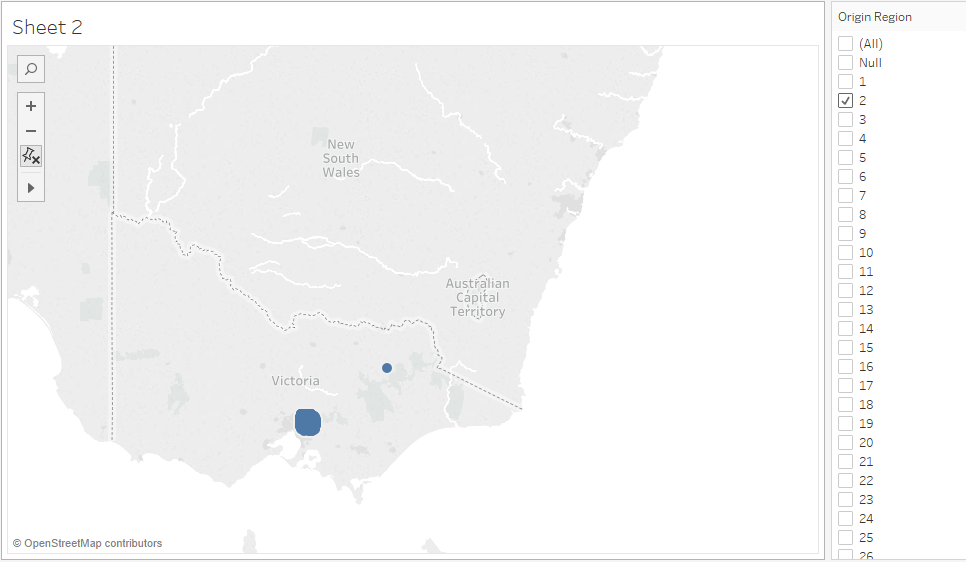


In [72]:
# Create a copy of original data
dummy_data = data.copy()

# Group by region
origin_regions = dummy_data.groupby("Origin Region")

# Aggregate function parameter for 'Mean Latitude' and 'Mean Longitude'
origin_fun = {'Origin Latitude':{'Mean Latitude':'mean'}, 'Origin Longitude':{'Mean Longitude':'mean'}}

# Perform aggregate functions
groupby_origin_region = origin_regions.aggregate(origin_fun)

# For aesthetics
groupby_origin_region = groupby_origin_region.reset_index() # reset its index
groupby_origin_region.columns = groupby_origin_region.columns.droplevel(0) # drop level 0 index
groupby_origin_region.rename(columns = {'':'Origin Region'},inplace = True) # rename the first column

# Initialize the columns
dummy_data['Mean Latitude'] = 0
dummy_data['Mean Longitude'] = 0

# Iterate through reasons
for each in groupby_origin_region['Origin Region']:
    
    # Place region-wise mean latitude in 'Mean Latitude' column 
    dummy_data.loc[dummy_data['Origin Region'] == each, ['Mean Latitude']] = groupby_origin_region.loc[(groupby_origin_region["Origin Region"] == each), ['Mean Latitude']].values
    
    # Place region-wise mean longitude in 'Mean Longitude' column 
    dummy_data.loc[dummy_data['Origin Region'] == each, ['Mean Longitude']] = groupby_origin_region.loc[(groupby_origin_region["Origin Region"] == each), ['Mean Longitude']].values

# Check for Origin Region = NaN
dummy_data[dummy_data['Mean Latitude'] == 0.0]

G:\Setups\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Mean Latitude,Mean Longitude
2075,ID1288162411,2.0,0.0,15.159,NaN,23.0,-37.667909,144.596032,-37.604719,146.906690,203.806,2018-02-27,01:02:05,181.83,4:03:54,161.10,0.0,0.0
10263,ID1876388577,3.0,0.0,35.613,NaN,7.0,-37.507720,148.315637,-37.082102,146.318674,183.075,2018-07-23,02:06:27,163.56,4:50:00,196.80,0.0,0.0
12320,ID5918356665,2.0,1.0,11.201,NaN,48.0,-38.673460,145.035467,-36.782383,148.386555,362.398,2018-04-27,15:49:45,317.77,21:07:31,193.75,0.0,0.0
14360,ID1869763865,3.0,0.0,21.713,NaN,39.0,-38.703064,146.298022,-37.688687,142.983610,311.145,2018-03-15,17:08:46,273.34,21:42:06,193.59,0.0,0.0
14366,ID1570543654,1.0,0.0,39.779,NaN,25.0,-38.621035,147.653999,-38.479724,145.069888,225.506,2018-04-10,23:29:12,228.78,3:17:58,118.33,0.0,0.0
24605,ID1951642144,2.0,0.0,41.137,NaN,12.0,-37.180485,147.831797,-38.007308,148.394188,104.555,2018-07-17,03:04:21,96.76,4:41:06,150.20,0.0,0.0
24607,ID5589342170,1.0,1.0,18.894,NaN,30.0,-37.590266,143.737584,-38.726028,146.345044,260.893,2018-04-15,16:50:48,263.58,21:14:22,139.02,0.0,0.0
28706,ID1129796038,1.0,0.0,45.064,NaN,51.0,-37.432049,145.298166,-38.300392,145.224368,96.879,2018-07-04,00:20:29,102.26,2:02:44,112.45,0.0,0.0
34849,ID5125458806,3.0,1.0,12.733,NaN,21.0,-37.439290,144.398771,-37.607639,145.677121,114.405,2018-02-18,11:39:40,104.70,13:24:22,194.34,0.0,0.0
38940,ID5292632132,1.0,1.0,11.983,NaN,32.0,-38.485137,144.493336,-36.841120,143.673722,196.741,2018-07-08,02:14:50,200.48,5:35:18,151.74,0.0,0.0


The below code checks the maximum distance of every point in an origin region. Observation from the below table showcases that each origin region is bounded approximately by a radius of 20-25 km. Any origin region having maximum distance of a point beyond this radius is an outlier.

#### Note:

1. The threshold radius of every origin region is considered as 30 km. Any point whose distance from mean is beyond this radius is an   outlier.

In [73]:
# Calculate distance of every point from mean
dummy_data['Distance from Mean'] = dummy_data.apply(lambda x: distance(x["Origin Latitude"], x["Origin Longitude"], x['Mean Latitude'], x["Mean Longitude"]), axis=1)

# Create a dataset without outliers
dummyclean = dummy_data[dummy_data['Distance from Mean']<30].copy()

# Aggregate function parameter for 'Min Latitude', 'Max Latitude', 'Min Longitude', 'Max Longitude'
origin_fun = {'Origin Latitude':{'Min Latitude':'min', 'Max Latitude':'max'}, 'Origin Longitude':{'Min Longitude':'min', 'Max Longitude':'max'}}

# Perform aggregate functions
groupby_origin_region = dummyclean.groupby("Origin Region").aggregate(origin_fun)

# For aesthetics
groupby_origin_region = groupby_origin_region.reset_index() # reset its index
groupby_origin_region.columns = groupby_origin_region.columns.droplevel(0) # drop level 0 index
groupby_origin_region.rename(columns = {'':'Origin Region'},inplace = True) # rename the first column

G:\Setups\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


* Boundaries for every origin region are obtained from minimum and maximum latitudes and longitudes for every region.
* Using boundaries, impute the data points to their corresponding origin region.

In [74]:
# Function to assign region
def origin_region(lat,long):
    
    # Iterate through regions
    for i in range(len(groupby_origin_region)):
        
        # Check the boundary conditions for every the co-ordinates 
        condition = (lat >= groupby_origin_region["Min Latitude"][i] and lat <= groupby_origin_region["Max Latitude"][i]) and (long >= groupby_origin_region["Min Longitude"][i] and long <= groupby_origin_region["Max Longitude"][i])
        
        # Return the region number if the condition is satisfied
        if condition:
            return groupby_origin_region["Origin Region"][i]
            

# Verify and impute the origin region for every origin latitude and longitude
dummy_data["Origin Region"] = dummy_data.apply(lambda x: origin_region(x["Origin Latitude"], x["Origin Longitude"]), axis=1)
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39508 entries, 0 to 39507
Data columns (total 19 columns):
Id                       39508 non-null object
Drone Type               39498 non-null float64
Post Type                39488 non-null float64
Package Weight           39508 non-null float64
Origin Region            39508 non-null float64
Destination Region       39498 non-null float64
Origin Latitude          39508 non-null float64
Origin Longitude         39508 non-null float64
Destination Latitude     39508 non-null float64
Destination Longitude    39508 non-null float64
Journey Distance         39508 non-null float64
Departure Date           39508 non-null object
Departure Time           39508 non-null object
Travel Time              39508 non-null float64
Delivery Time            39508 non-null object
Delivery Fare            39479 non-null float64
Mean Latitude            39508 non-null float64
Mean Longitude           39508 non-null float64
Distance from Mean       39508 

In [75]:
# Copy the cleansed data from dummy data frame to original data frame
data["Origin Region"] = dummy_data["Origin Region"]

# Drop the substitute column after imputing in original column
dummy_data.drop(["Mean Latitude", "Mean Longitude", "Distance from Mean"], axis=1, inplace= True)

#### Destination region

* Similar approach has been applied for alloting Destination regions.

* The following image shows outliers for origin region 2.0


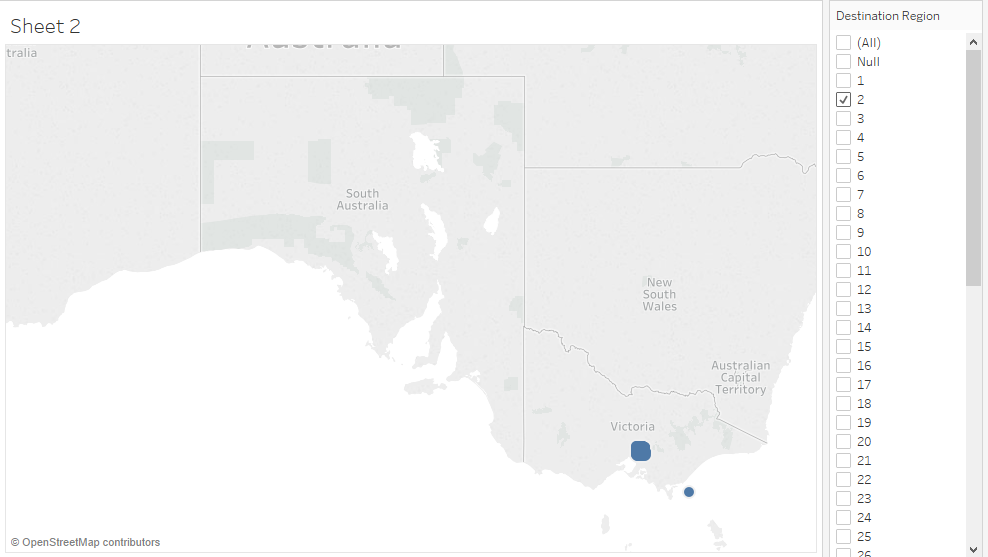


In [76]:
# Create a copy of original data
dummy_data = data.copy()

# Group by region
destination_regions = dummy_data.groupby("Destination Region")

# Aggregate function parameter for 'Mean Latitude' and 'Mean Longitude'
destination_fun = {'Destination Latitude':{'Mean Latitude':'mean'}, 'Destination Longitude':{'Mean Longitude':'mean'}}

# This 'groupby_destination_region' dataframe contains boundries of origin latitudes and longitudes
groupby_destination_region = destination_regions.aggregate(destination_fun)

# For aesthetics
groupby_destination_region = groupby_destination_region.reset_index() # reset its index
groupby_destination_region.columns = groupby_destination_region.columns.droplevel(0) # drop level 0 index
groupby_destination_region.rename(columns = {'':'Destination Region'},inplace = True) # rename the first column

# Initialize the columns
dummy_data['Mean Latitude'] = 0
dummy_data['Mean Longitude'] = 0

# Iterate through reasons
for each in groupby_destination_region['Destination Region']:
    
    # Place region-wise mean latitude in 'Mean Latitude' column 
    dummy_data.loc[dummy_data['Destination Region'] == each, ['Mean Latitude']] = groupby_destination_region.loc[(groupby_destination_region["Destination Region"] == each), ['Mean Latitude']].values
    
    # Place region-wise mean longitude in 'Mean Longitude' column 
    dummy_data.loc[dummy_data['Destination Region'] == each, ['Mean Longitude']] = groupby_destination_region.loc[(groupby_destination_region["Destination Region"] == each), ['Mean Longitude']].values

# Check for Destination Region = NaN
dummy_data[dummy_data['Mean Latitude'] == 0.0]

G:\Setups\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,Id,Drone Type,Post Type,Package Weight,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance,Departure Date,Departure Time,Travel Time,Delivery Time,Delivery Fare,Mean Latitude,Mean Longitude
2088,ID1739778224,2.0,0.0,30.481,31.0,NaN,-36.540611,143.528011,-38.645940,144.403517,246.750,2018-05-10,11:13:00,218.64,14:51:38,133.45,0.0,0.0
4143,ID1143372990,1.0,0.0,13.599,54.0,NaN,-38.039410,147.216294,-37.336654,144.101257,285.323,2018-07-20,13:40:51,287.61,18:28:27,112.07,0.0,0.0
8238,ID1730277155,1.0,0.0,10.093,48.0,NaN,-36.770638,148.337016,-37.653357,146.169634,215.805,2018-01-05,18:38:42,219.23,22:17:55,102.66,0.0,0.0
10293,ID5496551203,1.0,1.0,6.265,48.0,NaN,-36.696352,148.419637,-37.826450,145.215623,310.463,2018-04-25,10:03:59,312.34,15:16:19,133.98,0.0,0.0
12339,ID5355146240,2.0,1.0,10.153,52.0,NaN,-38.958783,143.963687,-37.473360,148.131350,400.201,2018-07-13,03:01:03,350.17,8:51:13,208.35,0.0,0.0
20145,ID1521611289,1.0,0.0,11.612,34.0,NaN,-38.239897,146.273280,-36.689096,144.152913,254.741,2018-01-23,06:37:07,257.53,10:54:38,95.18,0.0,0.0
26665,ID1773947968,1.0,0.0,12.495,18.0,NaN,-36.845605,144.121791,-37.578448,145.119306,120.312,2018-04-28,00:44:22,125.31,2:49:40,112.63,0.0,0.0
26676,ID5651508347,2.0,1.0,16.368,46.0,NaN,-37.992313,145.803653,-36.792377,144.041859,205.224,2018-02-03,01:14:42,183.05,4:17:45,189.31,0.0,0.0
30762,ID1491932941,1.0,0.0,6.014,22.0,NaN,-38.901701,143.597573,-38.361557,146.879898,291.672,2018-06-13,14:35:17,293.86,19:29:08,110.37,0.0,0.0
38956,ID5303230584,2.0,1.0,12.551,21.0,NaN,-37.696102,145.621052,-38.512307,147.545374,191.481,2018-05-13,03:36:10,171.27,6:27:26,190.93,0.0,0.0


The below code checks the maximum distance of every point in an destination region. Observation from the below table showcases that each destination region is bounded approximately by a radius of 20-25 km. Any destination region having maximum distance of a point beyond this radius is an outlier.

#### Note:

1. The threshold radius of every destination region is considered as 30 km. Any point whose distance from mean is beyond this radius is an   outlier.

In [ ]:
# Calculate distance of every point from mean
dummy_data['Distance from Mean'] = dummy_data.apply(lambda x: distance(x["Destination Latitude"], x["Destination Longitude"], x['Mean Latitude'], x["Mean Longitude"]), axis=1)

# Create a dataset without outliers
dummyclean = dummy_data[dummy_data['Distance from Mean']<30].copy()

# Aggregate function parameter for 'Min Latitude', 'Max Latitude', 'Min Longitude', 'Max Longitude'
destination_fun = {'Destination Latitude':{'Min Latitude':'min', 'Max Latitude':'max'}, 'Destination Longitude':{'Min Longitude':'min', 'Max Longitude':'max'}}

# This 'groupby_destination_region' dataframe contains boundries of destination latitudes and longitudes
groupby_destination_region = dummyclean.groupby("Destination Region").aggregate(destination_fun)

# For aesthetics
groupby_destination_region = groupby_destination_region.reset_index() # reset its index
groupby_destination_region.columns = groupby_destination_region.columns.droplevel(0) # drop level 0 index
groupby_destination_region.rename(columns = {'':'Destination Region'},inplace = True) # rename the first column

G:\Setups\Anaconda3\lib\site-packages\pandas\core\groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


* Boundaries for every destination region are obtained from minimum and maximum latitudes and longitudes for every region.
* Using boundaries, impute the data points to their corresponding destination region.

In [ ]:
# Function to assign region
def destination_region(lat,long):
    
    # Iterate through regions
    for i in range(len(groupby_destination_region)):
        
        # Check the boundary conditions for every the co-ordinates 
        condition = (lat >= groupby_destination_region["Min Latitude"][i] and lat <= groupby_destination_region["Max Latitude"][i]) and (long >= groupby_destination_region["Min Longitude"][i] and long <= groupby_destination_region["Max Longitude"][i])
        
        # Return the region number if the condition is satisfied
        if condition:
            return groupby_destination_region["Destination Region"][i]
            

# Verify and impute the origin region for every origin latitude and longitude
dummy_data["Destination Region"] = dummy_data.apply(lambda x: destination_region(x["Destination Latitude"], x["Destination Longitude"]), axis=1)

dummy_data.info()

* From the above information, it can be observed that one Destination region is not getting replaced.
* It is inferred that it lies outside the boundry of every destination region.
* Observe the Destination region whose value is null.

In [ ]:
dummy_data[dummy_data["Destination Region"].isnull()]

* It is observed that this point lies on the boundry of region 2.0

In [ ]:
# Latitude and longitude boundaries for Destination Region=2.0
groupby_destination_region[groupby_destination_region["Destination Region"] == 2.0]

Hence, Destination Region value for this package is manually set to 2.0

In [ ]:
dummy_data[dummy_data["Destination Region"].isnull()] = 2.0

# Copy the cleansed data from dummy data frame to original data frame
data["Destination Region"] = dummy_data["Destination Region"]

# Drop the substitute column after imputing in original column
dummy_data.drop(["Mean Latitude", "Mean Longitude", "Distance from Mean"], axis=1, inplace= True)

### 3.f Data Cleaning for Departure Date

* The departure date has issues in month and date.
* First, syntactic issues are identified, i.e., verified if the date format is correct.

##### Define the functions to check year, date and time

In [ ]:
# Function to check year
def year_check(year): 
    
    # Check year in range '2000-2018'
    if int(year) not in range(2000,2019):
        return False
    else:
        return year

# Function to check month
def month_check(month,day):
    
    # Check if the 'month-day' format is correct
    if int(month) in range(1,13) and int(day) in range(1,32):
        return [month, day]
    
    # Check if the day and month are swapped
    elif int(month) in range(13,32) and int(day) in range(1,13):
        return [day, month]
    
    # Return False if the date is totally wrong
    else:
        return False

# Function to check day
def day_check(month, day):
    
    # list for months with 31 days.
    monthlist1 = [1,3,5,7,8,10,12] 
    
    # list for months with 30 days.
    monthlist2 = [4,6,9,11] 
    
    # month with 28 days.
    monthlist3 = 2 
    
    # Return correct day if day is out of range
    if month in monthlist1:
        if int(day) > 31: 
            return [month, 31]
        else:
            return [month,day]
    
    elif month in monthlist2:
        if int(day) > 30: 
            return [month, 30]
        else:
            return [month,day]
        
    else:
        if int(day) > 29: 
            return [month, 29]
        else:
            return [month,day]
    

* If the day for the particular month exceeds its limit, e.g., 2018-02-30,  then the particular day is round off to the last day of the month

In [ ]:
# Create a copy of original data
dummy_data = data.copy()

# List of dates split by '-'
dummy_date = dummy_data["Departure Date"].str.split("-")

# List to contain dates after fixing the issues
date_clean = []

# Verify each date
for each in dummy_date:
    
    # Check for year
    year = year_check(each[0])  
    
    # Corrected date
    date = ""
    
    # If no error in year
    if year != False:
        
        # Check for month
        month = month_check(each[1],each[2])
        
        # If no error in month
        if month != False:    
            
            # Check for day
            day = day_check(month[0], month[1])
            
            # Put the date in correct format
            date = str(year) + "-" + str(day[0]) + "-" + str(day[1])
            
            # Append it to the list of corrected dates
            date_clean.append(date)

* For the verification of the dates, apply check on the cleaned dates.
* Print the dates which are wrong.

In [ ]:
# Verify if any date is out of format. 

for each in date_clean:
    x = each.split("-")
    
    if not int(x[0]) in range(2000,2020):
        print(x[0] + "-->" + x)
    if not int(x[1]) in range(1,13):
        print(x[1] + "-->" + x)
    if not int(x[2]) in range(1,31):
        print(x[2] + "-->" + x)

* Add the corrected dates to the original data frame

In [ ]:
# Replace Departure Date in the original column
data["Departure Date"] = date_clean

### 3.g Data Cleaning for Post Type

* By visualising data in Tableau, it can be inferred that the "Post Type column" is related to the "ID" column.
* It is observed that the IDs that start with ID5 have "Post Type = 1.0" and IDs that start with ID1 have "Post Type = 0.0"

* The folllowing snippet shows this relation.


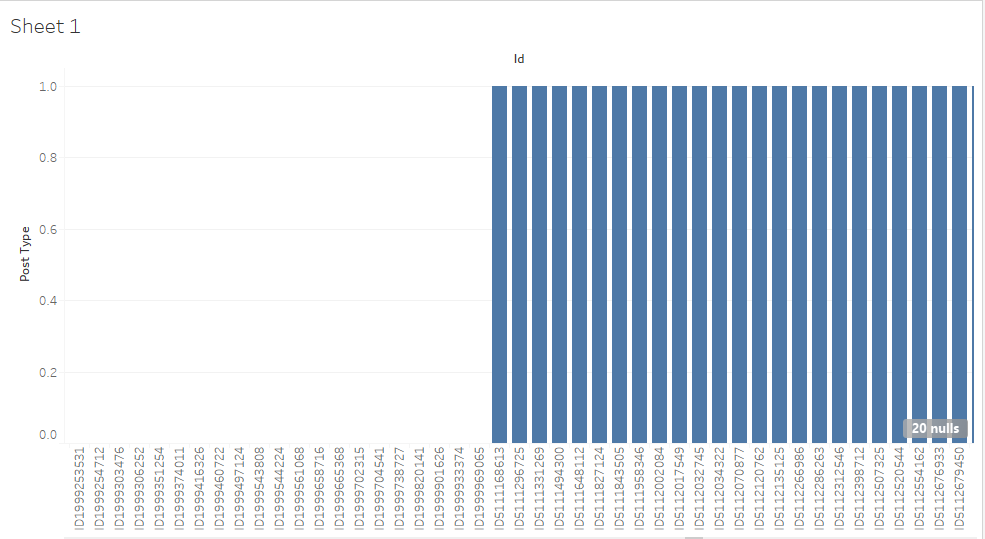



#### Define a function to check the starting of each ID

* According to the starting of each ID, assign the appropriate post type.
* Replace the corrected values in the original dataframe.

In [ ]:
# function to check the post type 
def post_type(id):
    if str(id).startswith("ID1"):
        return 0.0
    else:
        return 1.0

# Create a copy of original data
dummy_data = data.copy()

# Apply post_type() function
dummy_data["Post Type"] = dummy_data.apply(lambda x: post_type(x["Id"]), axis=1)


* To verify  the post types are assigned correctly, print the post types that are incorrectly assigned.
* Replace the correct post types in the original data frame.

In [ ]:
# verify if Post Type is assigned correctly
for each in dummy_data["Post Type"]:
    
    # Print the ncorrect values
    if each != 0.0 and each != 1.0:
        print(each)
        
# Replace Post Type in the original column
data["Post Type"]= dummy_data["Post Type"]

## Calculating speed of each Drone Type

* Firstly group the data by Drone Type and calculate the mean of Journey Distance and Travel Time.

In [ ]:
# Create a copy of original data
dummy_data = data.copy()

# Group by "Drone Type" and fine mean of Journey Distance and Travel Time.
drone_types = dummy_data.groupby("Drone Type")['Journey Distance', 'Travel Time'].mean()

# for aesthetics
drone_types = drone_types.reset_index() # reset its index
drone_types.rename(columns = {'':'Drone Type'},inplace = True) # rename the first column
drone_types

### Formulate the Speed Equation

For each Drone type,

Let the take-off speed be $x$ km/min, <br>
        landing speed be $y$ km/min,  <br>
        route speed be $z$ km/min.    <br>
        
By distance formula,
        $distance = speed * time$
        
Since take-off and landing times are 5 minutes,

$distance = 5 x + (duration - 10) z + 5 y $    
        
$distance = 5 (x + y) + (duration - 10) z$
        
Here, $(x+y)$ which ia takeoff and landing speed is a constant  $\beta$
        
$distance = 5 \beta$ + $(duration - 10) z$

$5 \beta$ = $distance - (duration - 10) z $    

$\beta$ = $(distance - (duration - 10) z) / 5$

Here, the unknown parameters are $\beta$ and $z$.

The value of $z$ can be calculated by randomly sampling the distance and corresponding time values for each Drone type and using those sample values to find the route speed $z$.

### Finding the route speed $z$ for each Drone Type

* Create dataframes for each drone type

In [ ]:
# Group by Drone Types
drone_types = dummy_data.groupby("Drone Type")['Journey Distance', 'Travel Time']

# List to hold dataframes grouped by Drone Types
dronetype_df=[]

# Iterate throuh drone_types groupby object to select the dataframes.
for a,b in drone_types:
    dronetype_df.append(b)

# Dataframe for drone type 1.0
type_1 = dronetype_df[0]

# Dataframe for drone type 2.0
type_2 = dronetype_df[1]

# Dataframe for drone type 3.0
type_3 = dronetype_df[2]

#### Route speed for Drone Type 1

* 10 random samples are observed for finding the route speed $z$ for Drone Type 1.
* Square matrix is formulated using 3 variables viz., x, y and z.
* Numpy library is used to solve the matrix equation and *linalg.lstsq()* method is used to calculate the samples.

In [ ]:
# Get the values of Travel Time
time = type_1['Travel Time'].values

# Get the values of Journey Distance
distance = type_1['Journey Distance'].values

# To store route speed samples
route_speed_type1 = []

# find the route speed for 10 random values
for j in range(0,30,3):
    # 3 time values
    t = []
    
    # 3 distance values
    d = []

    for i in range(j, j+3):
        x = [5,time[i]-10,5]
        t.append(x)

        y = [distance[i]]
        d.append(y)
    
    # Convert t and d to numpy array
    np.asarray(t)
    np.asarray(d)
    
    # Find the x, z and y values
    s=np.linalg.lstsq(t,d)
    
    # Get the route vales and append in the corresponding list
    route_speed_type1.append(s[0][1][0])

# Observe the route speed values
print(route_speed_type1)

**By observing the first 10 values for route speed of Drone type 1, it is assumed that route speed for Drone type 1 is 1.016.**

* Similar steps are followed to get the route speeds of Drone Type 2 and Drone Type 3.

#### Route speed for Drone Type 2

In [ ]:
# Get the values of Travel Time
time = type_2['Travel Time'].values

# Get the values of Journey Distance
distance = type_2['Journey Distance'].values

# To store route speed samples
route_speed_type2 = []

# find the route speed for 10 random values
for j in range(0,30,3):
    # 3 time values
    t = []
    
    # 3 distance values
    d = []

    for i in range(j, j+3):
        x = [5,time[i]-10,5]
        t.append(x)

        y = [distance[i]]
        d.append(y)
    
    # Convert t and d to numpy array
    np.asarray(t)
    np.asarray(d)
    
    # Find the x, z and y values
    s=np.linalg.lstsq(t,d)
    
    # Get the route vales and append in the corresponding list
    route_speed_type2.append(s[0][1][0])

# Observe the route speed values
print(route_speed_type2)

**By observing the first 10 values for route speed of Drone type 2, it is assumed that route speed for Drone type 2 is 1.166.**

#### Route speed for Drone Type 3

In [ ]:
# Get the values of Travel Time
time = type_3['Travel Time'].values

# Get the values of Journey Distance
distance = type_3['Journey Distance'].values

# To store route speed samples
route_speed_type3 = []

# find the route speed for 10 random values
for j in range(0,30,3):
    # 3 time values
    t = []
    
    # 3 distance values
    d = []

    for i in range(j, j+3):
        x = [5,time[i]-10,5]
        t.append(x)

        y = [distance[i]]
        d.append(y)
    
    # Convert t and d to numpy array
    np.asarray(t)
    np.asarray(d)
    
    # Find the x, z and y values
    s=np.linalg.lstsq(t,d)
    
    # Get the route vales and append in the corresponding list
    route_speed_type3.append(s[0][1][0])

# Observe the route speed values
print(route_speed_type3)

**By observing the first 10 values for route speed of Drone type 3, it is assumed that route speed for Drone type 3 is 1.166.**

###  Calculating $\beta$

Now,

Route speed $z$ for Drone type 1 is 1.016.

Route speed $z$ for Drone type 2 is 1.166.

Route speed 4z$ for Drone type 3 is 1.166.

Substituting these values in the equation  $\beta$ = (distance - (duration - 10) z) / 5 , the $\beta$ value for $Journey Distance$  and  $Travel Time$ for each Drone type is calculated.

#### For Drone type 1,

The mean 'Journey Distance' is 214.049 kms.

The mean 'Travel Time' is 217.490 minutes.

$\beta$ = $(214.049 - (217.490 - 10) * 1.016) / 5 $

$\beta$ for Drone type 1 is $0.65 km/min $

#### For Drone type 2,

The mean 'Journey Distance' is 213.304 kms.

The mean 'Travel Time' is 190.052 minutes.

$\beta$ = $(213.304 - (190.052 - 10) * 1.166) / 5 $

$\beta$ for Drone type 2 is $0.67 km/min $

#### For Drone type 3,

The mean 'Journey Distance' is 214.117 kms.

The mean 'Travel Time' is 190.171 minutes.

$\beta$ = $(214.117 - (190.171 - 10) * 1.166) / 5 $

$\beta$ for Drone type 3 is $0.81 km/min $

Using $\beta$ for Drone type 1, 2 and 3, estimate time duration for each row entry.



**Assign the $\beta$ values to every row and estimate the new Travel Time for each $\beta$ **

* Using this beta value, estimate the new time for each $\beta$

In [ ]:
# Assign the beta for drone type 1,2 and 3 to every row
dummy_data["Beta_1"]  = 0.65 # Drone type 1
dummy_data["Beta_2"]  = 0.67 # Drone type 2
dummy_data["Beta_3"]  = 0.81 # Drone type 3

# Assign the z for drone type 1,2 and 3 to every row
dummy_data["z_1"]  = 1.016 # Drone type 1
dummy_data["z_2"]  = 1.166 # Drone type 2
dummy_data["z_3"]  = 1.166 # Drone type 3

# function to calculate time according to each Beta
def time(distance, beta, z):
    
    # Formula to calculate travel time 
    duration = 10 + (distance - 5* beta) / z
    return round(duration, 2)

# 'Time Beta1' column is time calculated by Beta1 and z1
dummy_data['Time Beta1'] = dummy_data.apply(lambda x: time(x['Journey Distance'], x['Beta_1'], x['z_1']), axis=1)

# 'Time Beta2' column is time calculated by Beta2 and z2
dummy_data['Time Beta2'] = dummy_data.apply(lambda x: time(x['Journey Distance'], x['Beta_2'], x['z_2']), axis=1)

# 'Time Beta3' column is time calculated by Beta3 and z3
dummy_data['Time Beta3'] = dummy_data.apply(lambda x: time(x['Journey Distance'], x['Beta_3'], x['z_3']), axis=1)
dummy_data.head()

**Calculate the difference between travel time and time calculated by $\beta$ values of Drone Type 1, 2 and 3**.

* The travel time calculated for each $\beta$ value is compared to the original travel time. For the estimated time which is closest, its corresponding $\beta$ value is used to assign the correct drone type.

In [ ]:
# Function Change the negative values to positive
def negate(x):
    if x < 0:
        return -1*x
    return x

# Time Difference for Beta1
dummy_data['Difference Beta1'] = dummy_data['Time Beta1'] - dummy_data['Travel Time']

# Time Difference for Beta1
dummy_data['Difference Beta2'] = dummy_data['Time Beta2'] - dummy_data['Travel Time']

# Time Difference for Beta1
dummy_data['Difference Beta3'] = dummy_data['Time Beta3'] - dummy_data['Travel Time']

# Negate the negative difference
dummy_data['Difference Beta1'] = dummy_data.apply(lambda x: negate(x['Difference Beta1']), axis=1)
dummy_data['Difference Beta2'] = dummy_data.apply(lambda x: negate(x['Difference Beta2']), axis=1)
dummy_data['Difference Beta3'] = dummy_data.apply(lambda x: negate(x['Difference Beta3']), axis=1)

### 3.h Data Cleaning for Drone Type

* Use the time differences calculated above to impute the Drone Type.

In [ ]:
# Function to assign drone type
def assign_dronetype(diff1, diff2, diff3):
    if diff1 < 0.3:
        return 1.0
    elif diff2 < 0.3:
        return 2.0
    elif diff3 < 0.3:
        return 3.0

# Assign correct Drone Types
dummy_data['Drone Type'] = dummy_data.apply(lambda x: assign_dronetype(x['Difference Beta1'],x['Difference Beta2'],x['Difference Beta3']), axis=1)

**Copy the correct Drone types to the original data frame**

In [ ]:
# Replace 'Drone Type' in the original column with corrected 'Drone Type' column
data['Drone Type']= dummy_data['Drone Type']

### 3.h Fix Issues in Delivery Time

* There are errors in *travel time* since difference of *delivery time* and *departure time* is not same as *travel time* 
* Since we are able to assign each Drone Type, the values from either 'Time Beta1', 'Time Beta2' or 'Time Beta3' are matching the travel time.
* This proves our travel time is correct and there are anamolies in the Delivery Time column.
* This issue can be fixed using the time estimated using speed **calculation**

In [ ]:
# Function to assign Delivery Time
def assign_time(x):
    if x['Difference Beta1'] < 0.3:
        return x['Time Beta1']
    
    elif x['Difference Beta2'] < 0.3:
        return x['Time Beta2']
    
    elif x['Difference Beta3'] < 0.3:
        return x['Time Beta3']

# Calculate the New Travel Time values
dummy_data["Travel Time New"] = dummy_data.apply(lambda x : travel_time(to_minutes(x['Delivery Time']), to_minutes(x['Departure Time'])), axis=1)

# Calculate Difference between "Travel Time" and "Travel Time New"
dummy_data["Time Difference"] = dummy_data["Travel Time"] - dummy_data["Travel Time New"]

# take subset of rows whose "Time Difference" > 0.3
time_error = dummy_data[dummy_data["Time Difference"]>0.3]

# Impute Correct "Travel Time"
time_error["Travel Time"] = time_error.apply(lambda x: assign_time(x), axis = 1) 

# Substitute the result of subset rows to the main dataframe
dummy_data.loc[dummy_data["Time Difference"]>0.3, ["Travel Time"]] = time_error.loc[time_error["Time Difference"]>0.3, ["Travel Time"]].values


**Copy the correct Travel Time to the original data frame**

In [ ]:
# Replace 'Drone Type' in the original column with corrected 'Drone Type' column
data["Travel Time"]= dummy_data["Travel Time"]

* After fixing the "Travel Time", fix the Delivery Time
* Add the travel time to departure time to get the delivery time

In [ ]:
# Function to add travel time to departure time
def addtime(x):
    sec = x*60
    return str(datetime.timedelta(seconds=sec))

# function to calculate the delivery time
def deliverytime(departure, add):
    dep = departure.split(":")
    add = add.split(":")
    
    # Number of hours
    hours = int(dep[0]) + int(add[0])
    
    # Number of minutes
    mins = int(dep[1]) + int(add[1])
    
    # Number of seconds
    secs = round(float(dep[2])) + round(float(add[2]))  
    
    # Check if seconds exceed 59
    if secs>59:
        secs-=60
        mins+=1
    
    # Check if minutes exceed 59
    if mins>59:
        mins-=60
        hours+=1
    
    # Check if hours exceed 59
    if hours>24:
        hours-=24
    
    # convert time to hr:min:sec format
    time = str(hours) + ":" + str(mins) + ":" + str(secs)
    
    return time
    
#Calculate the travel time to be added
time_error["Add Time"]  = time_error.apply(lambda x: addtime(x["Travel Time"]), axis = 1) 

# Calculate the Delivery time
time_error["Delivery Time"]  = time_error.apply(lambda x: deliverytime(x["Departure Time"], x["Add Time"]), axis = 1) 

# Substitute the result of subset rows to the main dataframe
dummy_data.loc[dummy_data["Time Difference"]>0.3, ["Delivery Time"]] = time_error.loc[time_error["Time Difference"]>0.3, ["Delivery Time"]].values

* Verify if the columns are replaced by taking the time difference.
* If the length of returned dataframe is 0, then it can be inferred that the values are imputed correctly.
* Replace "Travel Time" in the original column with corrected "Travel Time" column

In [ ]:
# Calculate the New Travel Time values
dummy_data["Travel Time New"] = dummy_data.apply(lambda x : travel_time(to_minutes(x['Delivery Time']), to_minutes(x['Departure Time'])), axis=1)

# Calculate Difference between "Travel Time" and "Travel Time New"
dummy_data["Time Difference"] = dummy_data["Travel Time"] - dummy_data["Travel Time New"]

# take subset of rows whose "Time Difference" > 0.3
time_error = dummy_data[dummy_data["Time Difference"]>0.3]

print(len(time_error))

In [ ]:
# Replace "Travel Time" in the original column with corrected "Travel Time" column
data["Travel Time"]= dummy_data["Travel Time"]

# Drop the substitute column after imputing in original column
dummy_data.drop(["Beta_1", "Beta_2", "Beta_3", 'z_1','z_2', 'z_3', 'Time Beta1', 'Time Beta2', 'Time Beta3', 'Difference Beta1', 'Difference Beta2', 'Difference Beta3', 'Travel Time New', 'Time Difference'], axis=1, inplace= True)
data.info()

### 3.i Fixing Issues in Delivery fare

* Linear regression model is used to fix the anamolies in the Delivery Fare.
* Delivery Fare is compared to the rest of the columns with the help of Linear model.  
* For this the Departure time and Package Weight columns are converted into categorical variables.
* These categorical variables are used to train the dataset and impute the missing values

In [ ]:
# Create a copy of main data
dummy_data = data.copy()

# Plot of Delivery Fare v/s Package weight
dummy_data.plot.scatter(x="Package Weight", y="Delivery Fare")

In [ ]:
# Plot of Delivery Fare v/s Travel Time
dummy_data.plot.scatter(x="Travel Time", y="Delivery Fare")

In [ ]:
# Plot of Delivery Fare v/s Journey Distance
dummy_data.plot.scatter(x="Journey Distance", y="Delivery Fare")

In [ ]:
# Create Categorical variables for Departure Time
dummy_data.loc[(dummy_data["Departure Time"]>"06:00:00") & (dummy_data["Departure Time"] < "12:00:00"), "Category"] = "Morning"
dummy_data.loc[(dummy_data["Departure Time"]>"12:00:00") & (dummy_data["Departure Time"] < "21:00:00"), "Category"] = "Evening"
dummy_data.loc[(dummy_data["Departure Time"]>"21:00:00") & (dummy_data["Departure Time"] < "00:00:00"), "Category"] = "Night"
dummy_data.loc[(dummy_data["Departure Time"]>"00:00:00") & (dummy_data["Departure Time"] < "06:00:00"), "Category"] = "Night"

# Create dummies for Categorical variable of time
time = pd.get_dummies(data= dummy_data["Category"])

# Create Categorical variables for Departure Weight
dummy_data.loc[dummy_data["Package Weight"] < 50.0, "Weight Category"] = "Light"
dummy_data.loc[dummy_data["Package Weight"] > 50.0, "Weight Category"] = "Heavy"

# Create dummies for Categorical variable of weight
weight = pd.get_dummies(data= dummy_data["Weight Category"])

# Merge two datasets based on dummies
dummy_data = dummy_data.merge(time, left_index= True, right_index= True)
dummy_data = dummy_data.merge(weight, left_index= True, right_index= True)

dummy_data.info()

* Create a list of numerical and categorical variables to train the dataset

In [ ]:
# List of numerical and categorical variables
dummy_1 =dummy_data[['Drone Type', 'Post Type', 'Journey Distance', "Travel Time", "Evening", "Morning", "Night", "Heavy", "Light", "Delivery Fare"]].copy()

# Drop nulls
dummy_1 = dummy_1[pd.notnull(dummy_1['Delivery Fare'])]

#dummy_1 = dummy_1.reset_index(drop=True)
dummy_1.info()

* Train the Linear model with the help of training dataset.

In [ ]:
# Training and testing variables
X_train, X_test, y_train, y_test = train_test_split(dummy_1.iloc[:,:-1],dummy_1.iloc[:,-1:],random_state= 10)

# Score
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

* Use the **Inter Quartile Range** method to remove the outliers that lie outside the boundry of 25%-75%

In [ ]:
dummy_1["Delivery Fare"].describe()

In [ ]:
# Get the lower quartile
lower_quartile = dummy_1["Delivery Fare"].quantile(q=0.25)

# Get the higher quartile
higher_quartile = dummy_1["Delivery Fare"].quantile(q=0.75)

#Get the quartile range
quartile_range = higher_quartile - lower_quartile

# Get the lower end of fare
low = lower_quartile - 1.5 * quartile_range

# Get the higher end of fare
high = higher_quartile + 1.5*quartile_range

# Remove the outliers that lie outside the fare range
outliers= dummy_1.loc[(dummy_1["Delivery Fare"] < low) | (dummy_1["Delivery Fare"] > high)].index

# Check the number of outliers
len(outliers)

* Drop the outliers from the data frame

In [ ]:
dummy_1.drop(dummy_data.index[outliers], inplace=True)
#dummy_data.info()

* Create a newdata set to impute predicted value

In [ ]:
# Fit the regression model to the dataframe
impute_reg = LinearRegression()
impute_reg.fit(dummy_1[[x for x in dummy_1.columns if x != "Delivery Fare"]], dummy_1["Delivery Fare"])

# Substitute data set
dummy_data2 =dummy_data[['Drone Type', 'Post Type', 'Journey Distance', "Travel Time", "Evening", "Morning", "Night", "Heavy", "Light", "Delivery Fare"]].copy()

# Impute the missing values in the Substitute data frame based on the linear model
dummy_data2["Delivery Fare"][dummy_data2["Delivery Fare"].isnull()] = impute_reg.predict(dummy_data2.drop(["Delivery Fare"], axis=1))

#dummy_data2 = dummy_data2.reset_index(drop=True)
dummy_data2.info()

* Get the indices where Fare entries are null.
* Impute the null values with predicted values.

In [ ]:
# Get null indices
null_indexes = dummy_data.loc[dummy_data["Delivery Fare"].isnull()].index

# Impute with predicted fare values
dummy_data["Delivery Fare"] = dummy_data2["Delivery Fare"]

# Check if the values are replaced
dummy_data.loc[dummy_data["Delivery Fare"].isnull()]

* Test the data set and get the score of the model.
* Higher score is better.

In [ ]:
# Training variables
dummy_2 =dummy_data2[['Drone Type', 'Post Type', 'Journey Distance', "Travel Time", "Evening", "Morning", "Night", "Heavy", "Light", "Delivery Fare"]].copy()
dummy_2 = dummy_2[pd.notnull(dummy_2['Delivery Fare'])]

# Training and  Test set
X_train, X_test, y_train, y_test = train_test_split(dummy_2.iloc[:,:-1],dummy_2.iloc[:,-1:],random_state= 10)

# Run regression test
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

* After getting the final score, delete the categorical variables from the data frame.

In [ ]:
dummy_data.drop(['Category', 'Weight Category','Evening', 'Morning', 'Night', 'Heavy', 'Light'], axis=1, inplace= True)
dummy_data.info()

* Replace the Delivery Fare values in the original data frame

In [ ]:
# Replace "Delivery Fare" in the original column with corrected "Delivery Fare" column
data["Delivery Fare"]= dummy_data["Delivery Fare"]

data.info()

* Finally, after cleaning all the columns, put the data frame in the file "29279208_solution.csv".

In [ ]:
data.to_csv("29279208_solution.csv", index=False)

## 4. References

1. Where Developers Learn, Share, & Build Careers. (n.d.). Retrieved from https://stackoverflow.com/
2. https://pandas.pydata.org/pandas-docs/stable/
3. FIT5196 Tutorial Material
4. https://www.w3resource.com/python-exercises/math/python-math-exercise-27.php